# Лабораторная работа №3
## Обработка признаков (часть 2).

Рассмотрим исторические данные по выходу и продажам видеоигр из [на 2019 год](https://www.kaggle.com/ashaheedq/video-games-sales-2019)

## Задание:

[Оригинал](https://github.com/ugapanyuk/ml_course_2021/wiki/LAB_MMO__FEATURES_2):

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - масштабирование признаков (не менее чем тремя способами);
    - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
    - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
    - отбор признаков:
        - один метод из группы методов фильтрации (filter methods);
        - один метод из группы методов обертывания (wrapper methods);
        - один метод из группы методов вложений (embedded methods).


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [3]:
save_path = '../videogames/video_games_s2.csv'
df = pd.read_csv(save_path)
print(f'Loaded {len(df)} games')

Loaded 219 games


In [4]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales,Critic_Score_boxcox,User_Score_boxcox
0,3,Mario Kart Wii,9,3,13,27,83,8.2,9.1,2008.0,37.14,2.056560,1.218568
1,5,Wii Sports Resort,13,3,13,27,83,8.0,8.8,2009.0,33.09,2.032969,1.209662
2,7,New Super Mario Bros.,7,3,1,27,83,9.1,8.1,2006.0,30.80,2.155914,1.186848
3,9,New Super Mario Bros. Wii,7,3,13,27,83,8.6,9.2,2009.0,30.22,2.102027,1.221433
4,12,Wii Play,5,3,13,27,83,5.9,4.5,2007.0,28.02,1.741018,0.987667


In [5]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    for col in col_list:
        sns.distplot(df1[col], ax=ax1)
    # второй график
    ax2.set_title(label2)
    for col in col_list:
        sns.distplot(df2[col], ax=ax2)
    plt.show()

In [6]:
def draw_data(col_list, df, df_scaled):
    df[col_list].plot()
    df_scaled[col_list].plot()
    plt.show()

In [7]:
def get_scaled(df, columns, scaler=StandardScaler()):
    data_scaled = scaler.fit_transform(df[columns])
    df_scaled = pd.DataFrame(data_scaled, columns=columns)
    draw_data(columns, df, df_scaled)
    draw_kde(columns, df, df_scaled, 'Before', 'After')
    return df_scaled

In [8]:
def apply_scaled(df, df_scaled, columns):
    for col in columns:
        df[f'{col}_scaled'] = df_scaled[col]
    return df

In [9]:
columns = ['Sales', 'ESRB_Rating', 'Genre', 'Platform', 'Publisher', 'Developer', 'Year', 'Critic_Score_boxcox', 'User_Score_boxcox']

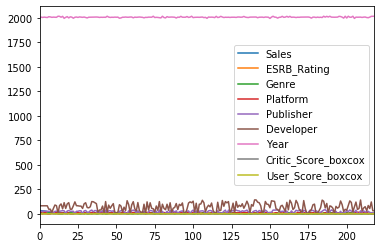

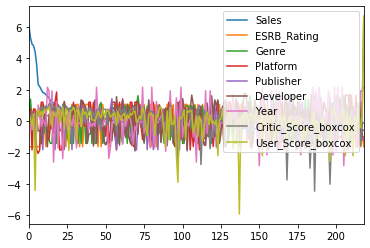

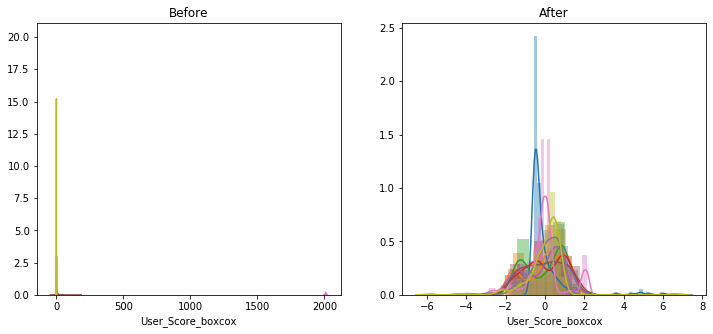

In [10]:
df_scaled_std = get_scaled(df, columns, StandardScaler())

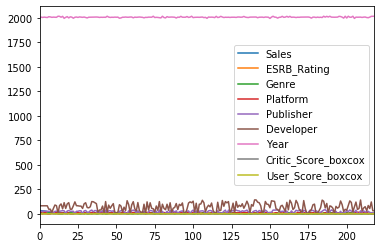

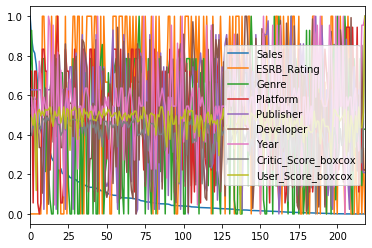

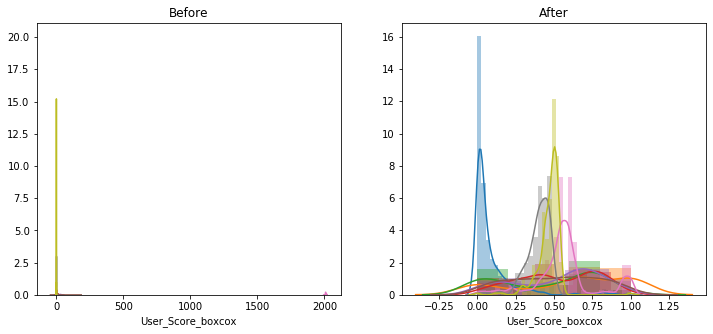

In [11]:
df_scaled_maxmin = get_scaled(df, columns, MinMaxScaler())

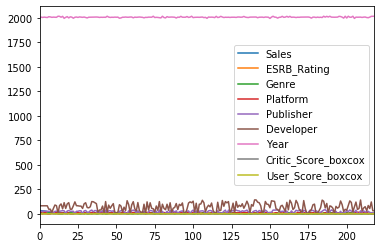

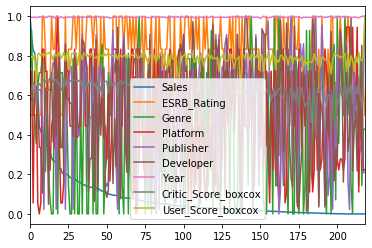

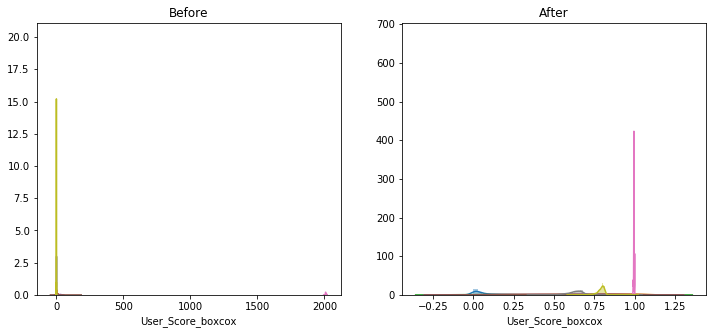

In [12]:
df_scaled_maxabs = get_scaled(df, columns, MaxAbsScaler())

In [13]:
df = apply_scaled(df, df_scaled_maxmin, columns)
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,...,User_Score_boxcox,Sales_scaled,ESRB_Rating_scaled,Genre_scaled,Platform_scaled,Publisher_scaled,Developer_scaled,Year_scaled,Critic_Score_boxcox_scaled,User_Score_boxcox_scaled
0,3,Mario Kart Wii,9,3,13,27,83,8.2,9.1,2008.0,...,1.218568,1.000000,0.0,0.642857,0.722222,0.627907,0.58042,0.545455,0.408186,0.501140
1,5,Wii Sports Resort,13,3,13,27,83,8.0,8.8,2009.0,...,1.209662,0.890953,0.0,0.928571,0.722222,0.627907,0.58042,0.590909,0.396453,0.486388
2,7,New Super Mario Bros.,7,3,1,27,83,9.1,8.1,2006.0,...,1.186848,0.829295,0.0,0.500000,0.055556,0.627907,0.58042,0.454545,0.457597,0.448604
3,9,New Super Mario Bros. Wii,7,3,13,27,83,8.6,9.2,2009.0,...,1.221433,0.813678,0.0,0.500000,0.722222,0.627907,0.58042,0.590909,0.430797,0.505884
4,12,Wii Play,5,3,13,27,83,5.9,4.5,2007.0,...,0.987667,0.754443,0.0,0.357143,0.722222,0.627907,0.58042,0.500000,0.251260,0.118721


In [14]:
df.tail(2)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,...,User_Score_boxcox,Sales_scaled,ESRB_Rating_scaled,Genre_scaled,Platform_scaled,Publisher_scaled,Developer_scaled,Year_scaled,Critic_Score_boxcox_scaled,User_Score_boxcox_scaled
217,55424,Thumper,6,4,4,9,32,9.0,9.3,2017.0,...,1.224249,0.0,0.333333,0.428571,0.222222,0.209302,0.223776,0.954545,0.452359,0.510547
218,66666,FakeGame,6,3,4,9,32,29.0,64.0,2018.0,...,1.519776,0.0,0.000000,0.428571,0.222222,0.209302,0.223776,1.000000,1.000000,1.000000


## Поиск и устранение выбросов

In [15]:
from enum import Enum
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

In [17]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [18]:
scaled_columns = [f'{x}_scaled' for x in columns]

In [19]:
method_list = ['Original']
df_changed = [df]

In [20]:
for obt in OutlierBoundaryType:
    
    df2 = df.copy()
    
    for col in columns:    
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df2, col, obt)
        # Изменение данных
        df2[col] = np.where(df2[col] > upper_boundary, upper_boundary, 
                                 np.where(df2[col] < lower_boundary, lower_boundary, df2[col]))
    
    for col in scaled_columns:    
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df2, col, obt)
        # Изменение данных
        df2[col] = np.where(df2[col] > upper_boundary, upper_boundary, 
                                 np.where(df2[col] < lower_boundary, lower_boundary, df2[col]))

    title = '{}-updated'.format(obt)
    # Сохранение в списки
    method_list.append(title)
    df_changed.append(df2)

In [21]:
df_changed[1].tail(2)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,...,User_Score_boxcox,Sales_scaled,ESRB_Rating_scaled,Genre_scaled,Platform_scaled,Publisher_scaled,Developer_scaled,Year_scaled,Critic_Score_boxcox_scaled,User_Score_boxcox_scaled
217,55424,Thumper,6.0,4.0,4.0,9.0,32.0,9.0,9.3,2017.0,...,1.224249,0.0,0.333333,0.428571,0.222222,0.209302,0.223776,0.954545,0.452359,0.510547
218,66666,FakeGame,6.0,3.0,4.0,9.0,32.0,29.0,64.0,2018.0,...,1.344304,0.0,0.000000,0.428571,0.222222,0.209302,0.223776,1.000000,0.669961,0.709383


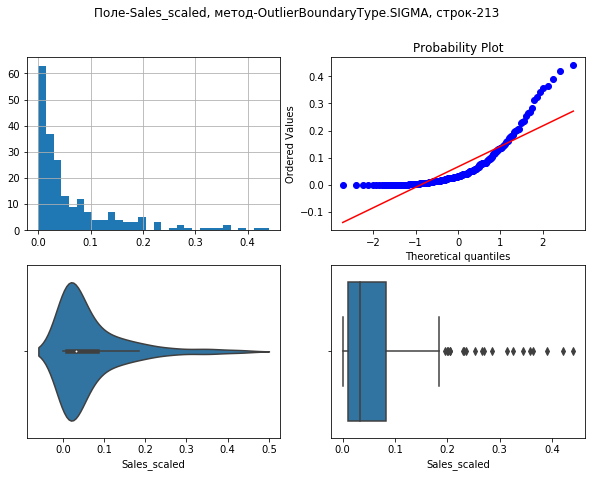

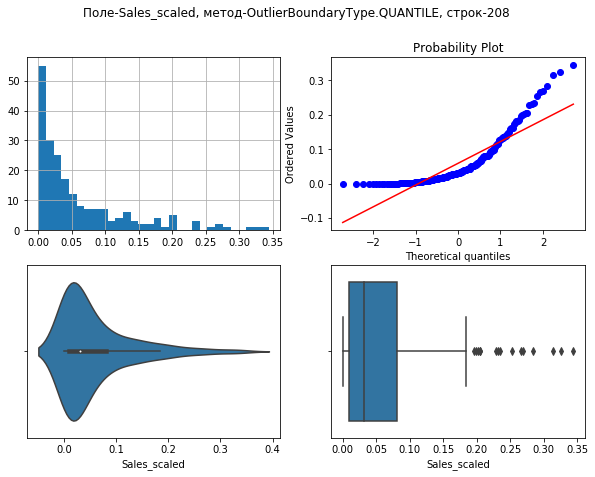

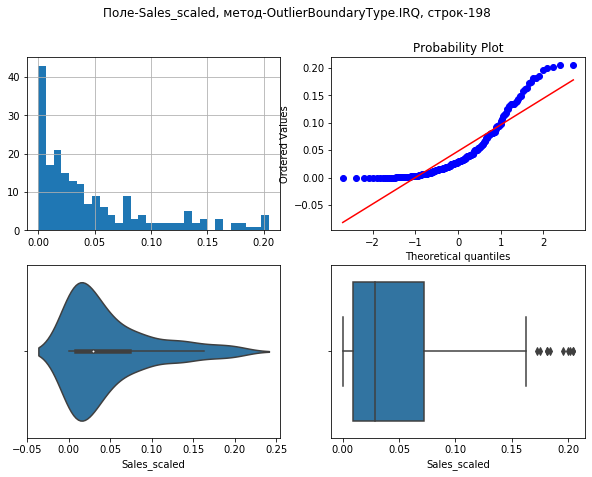

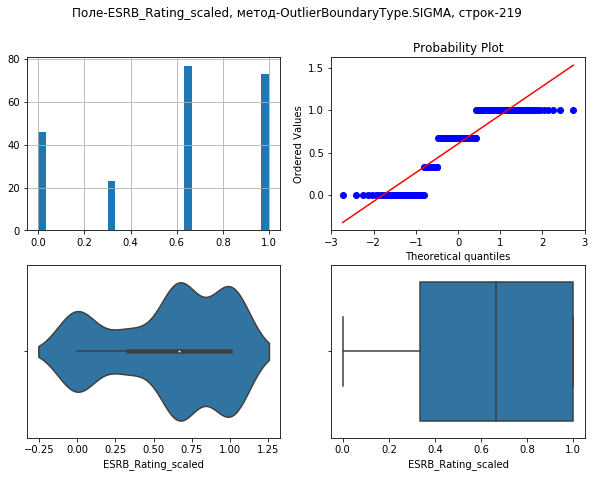

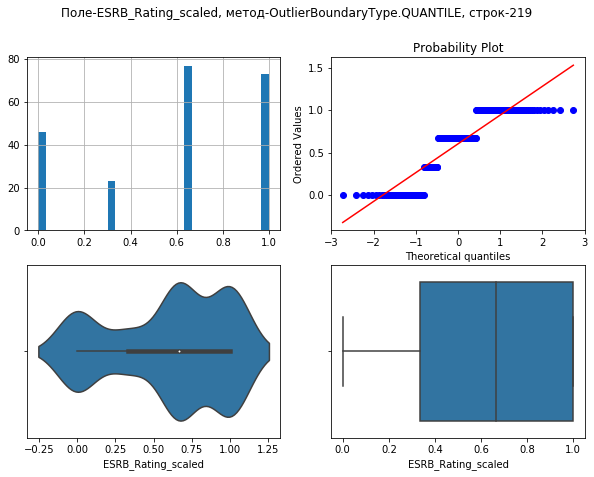

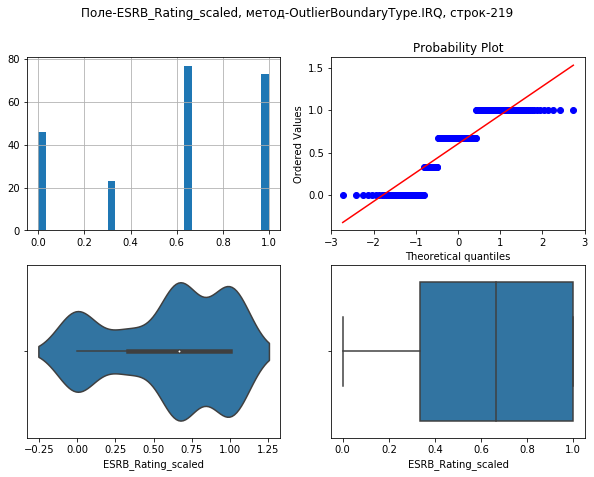

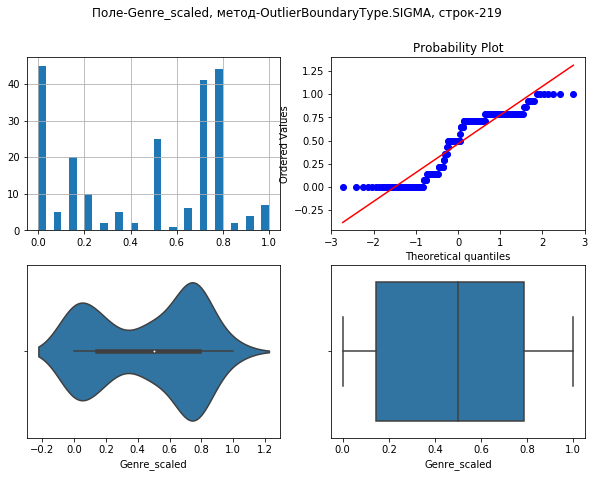

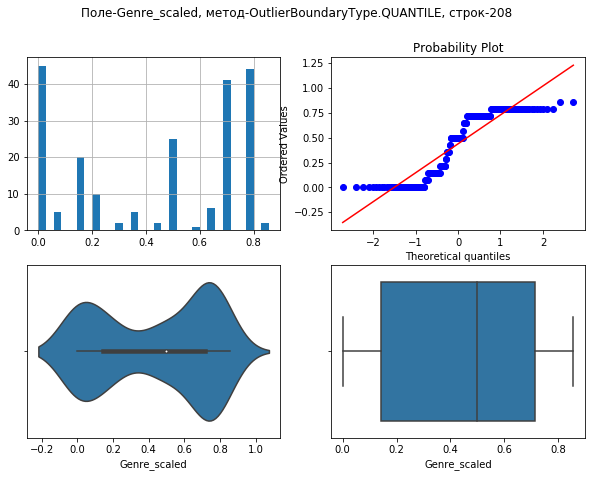

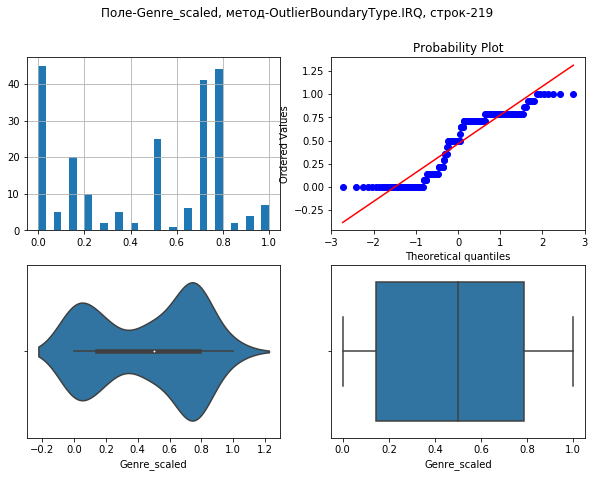

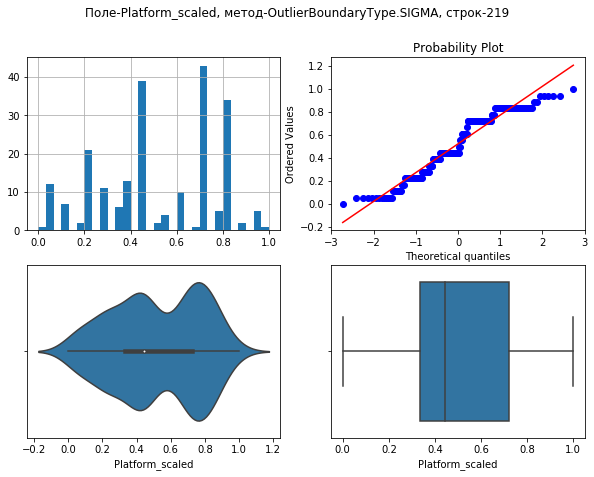

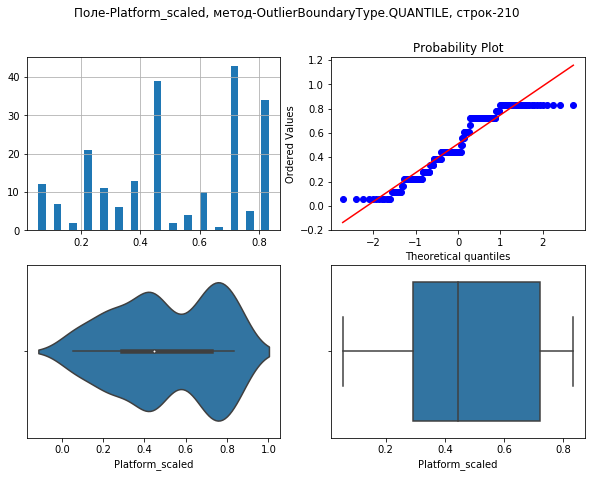

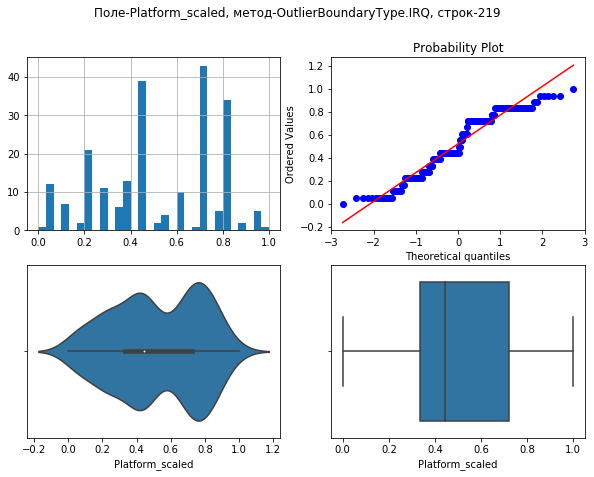

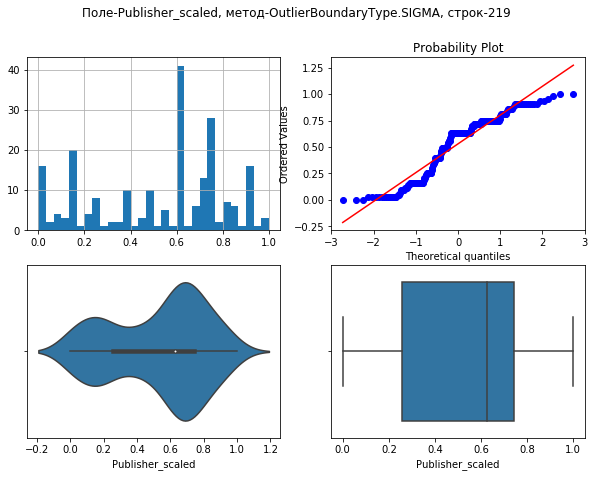

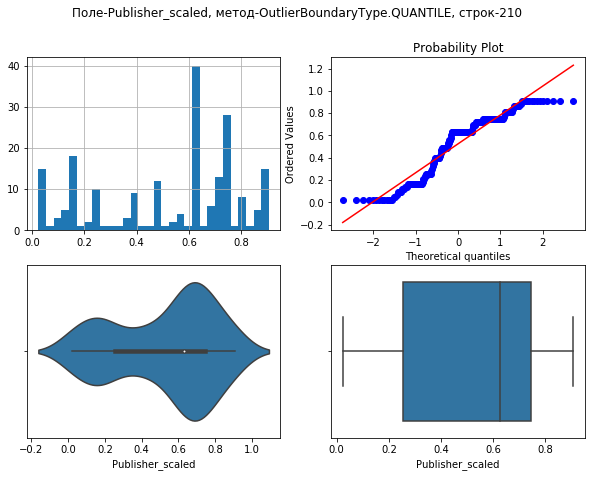

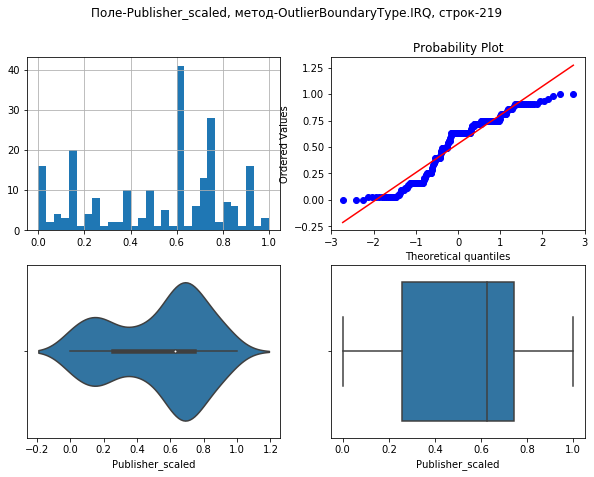

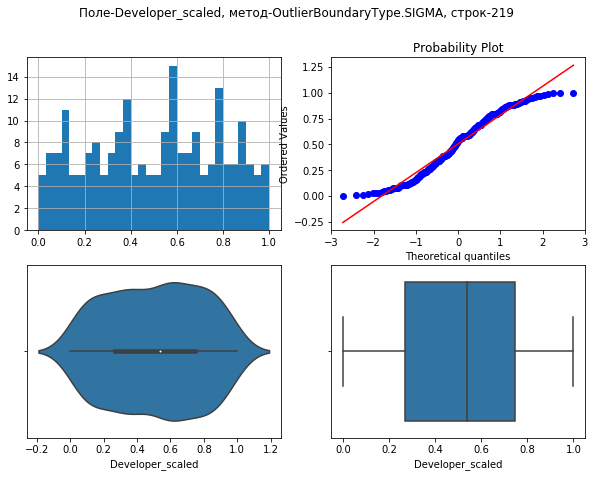

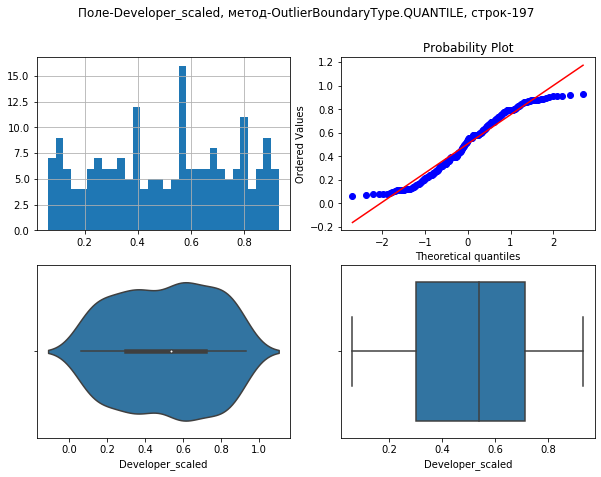

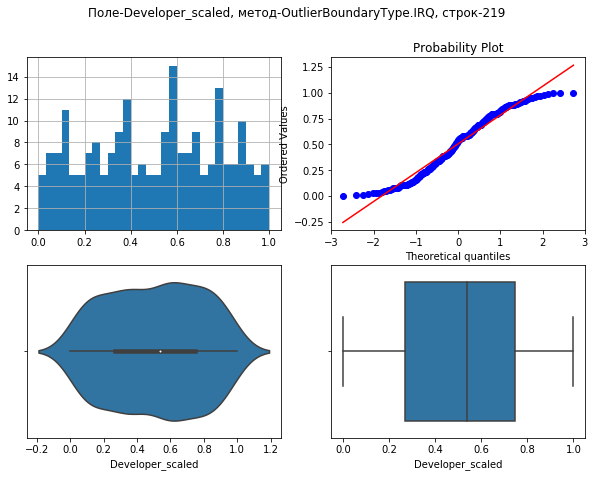

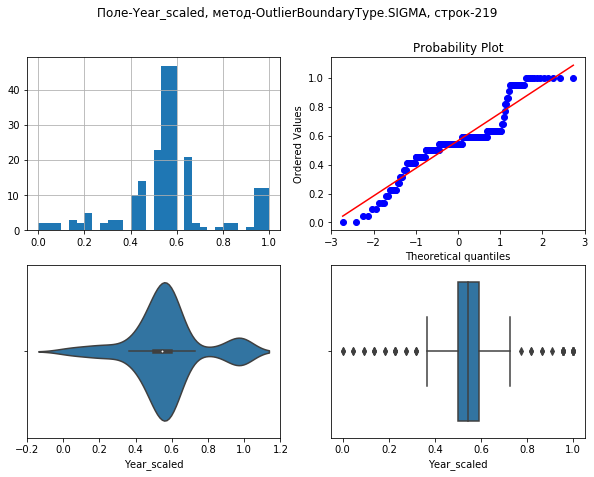

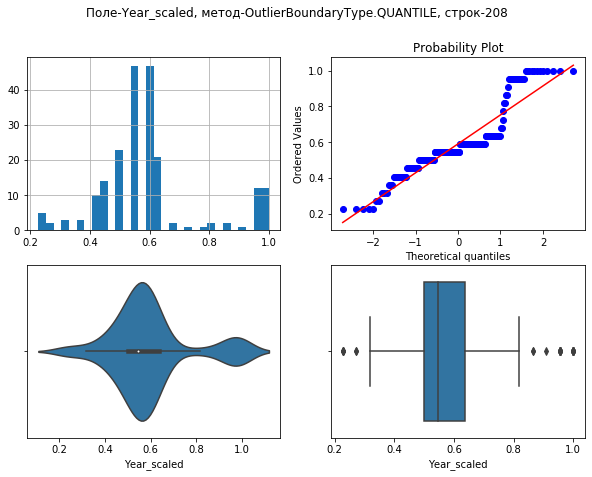

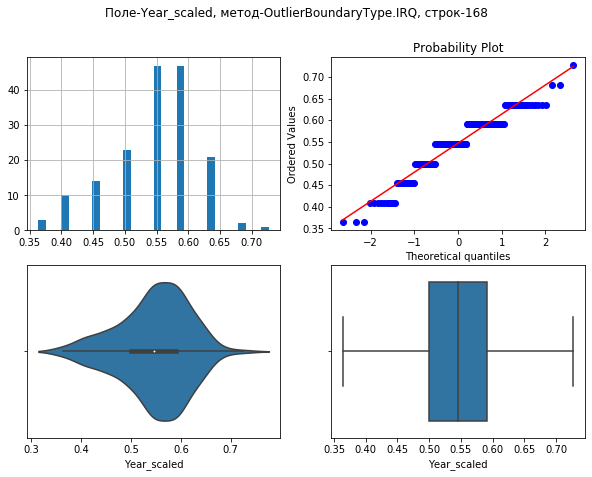

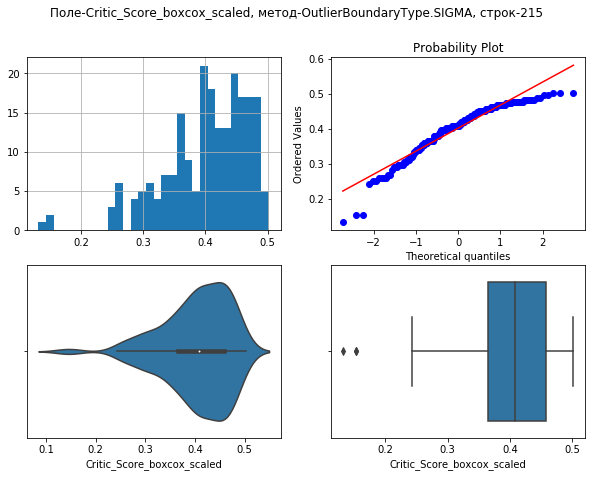

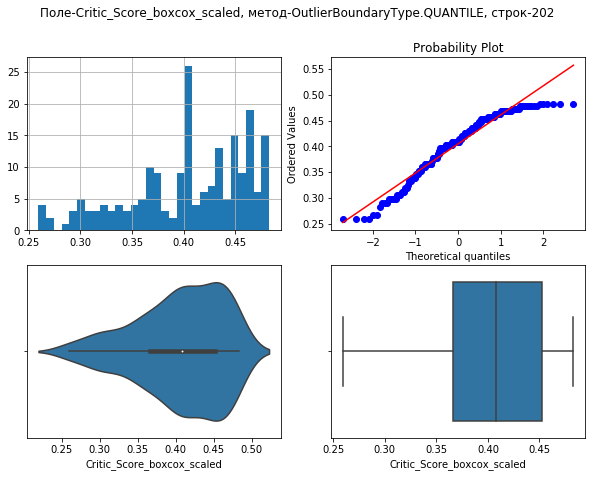

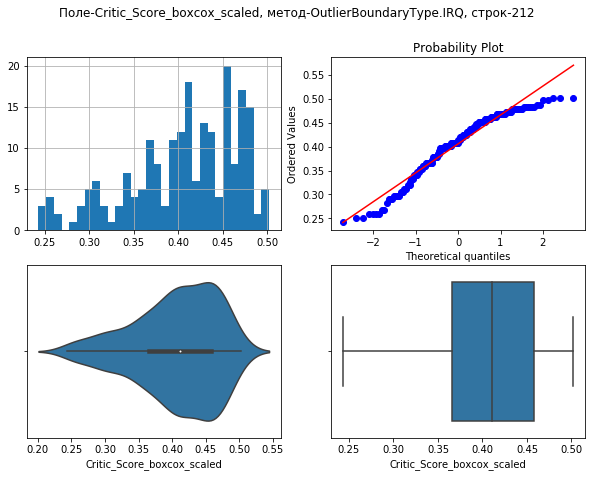

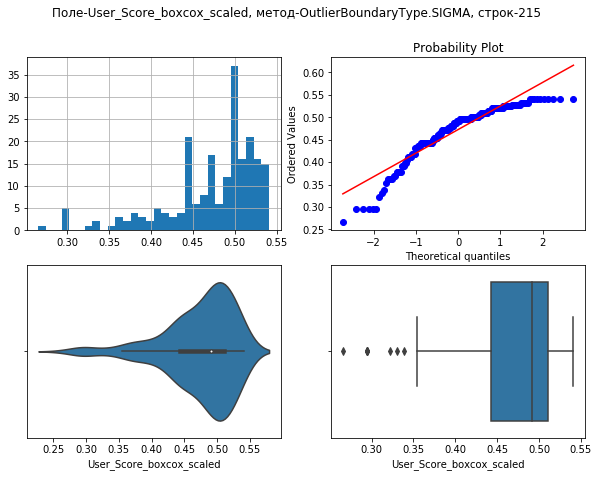

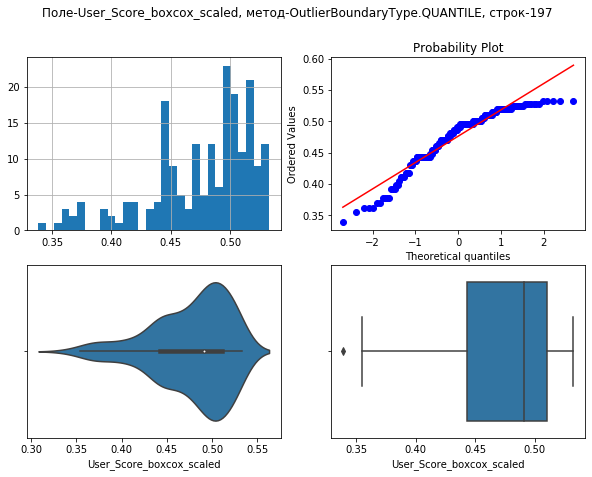

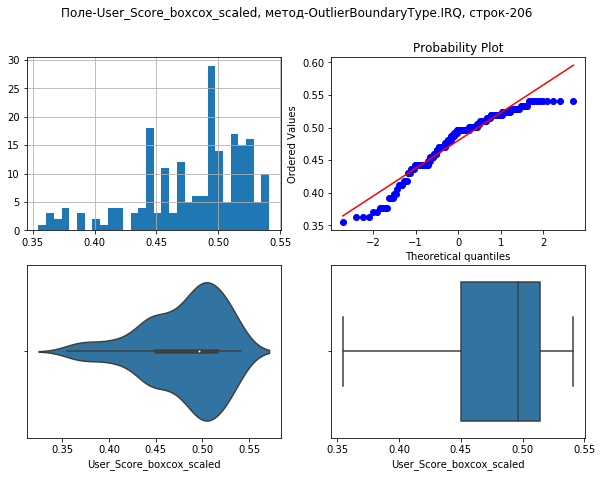

In [22]:
for col in scaled_columns:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(df[col] > upper_boundary, True, 
                                 np.where(df[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        df_trimmed = df.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, df_trimmed.shape[0])
        diagnostic_plots(df_trimmed, col, title)

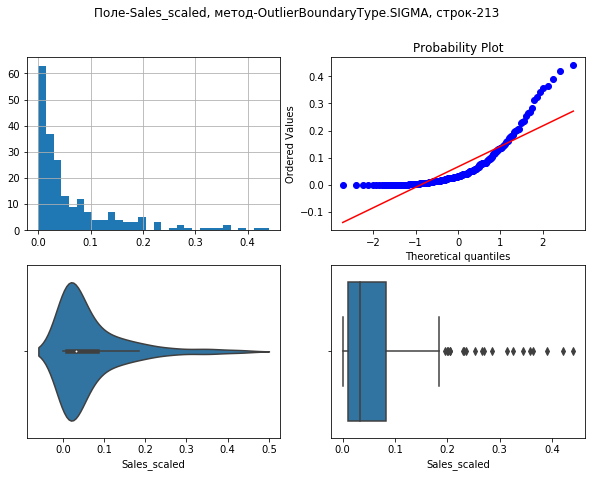

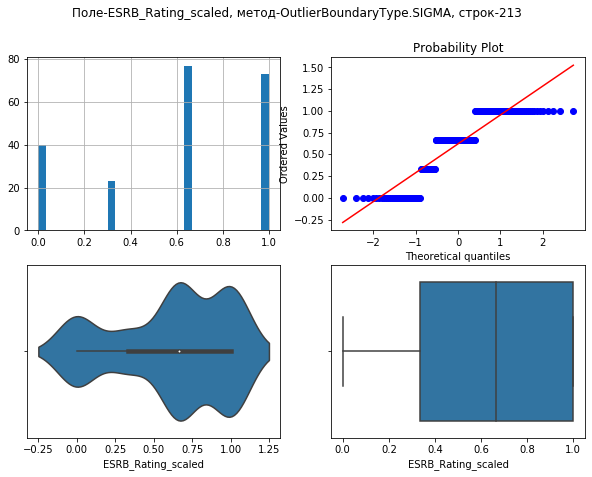

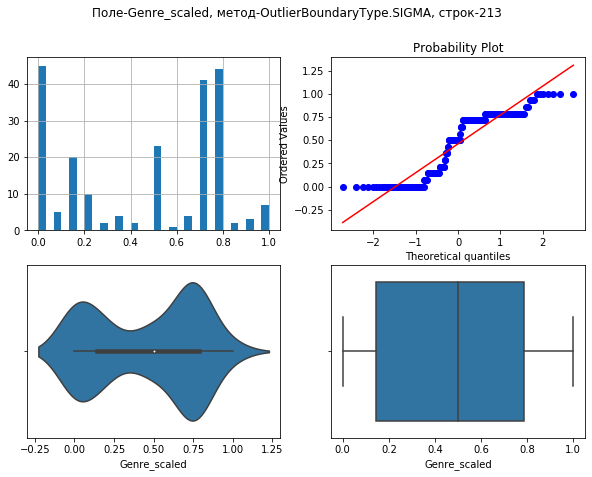

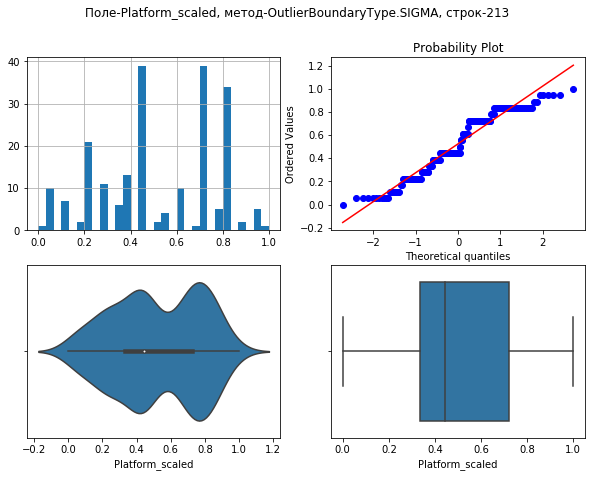

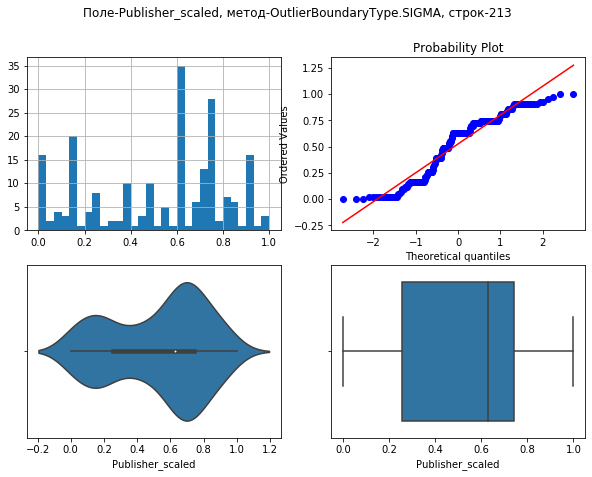

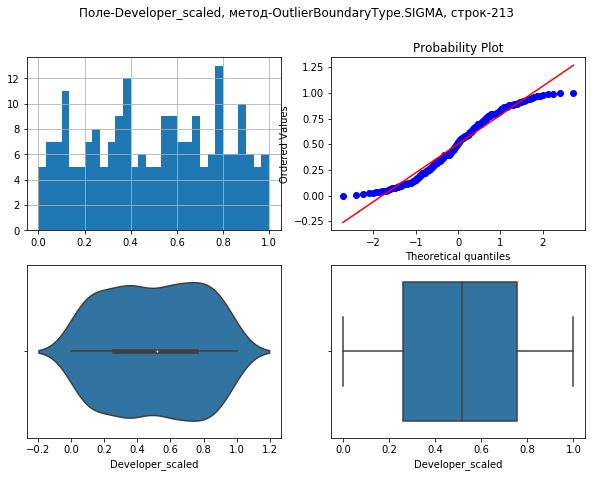

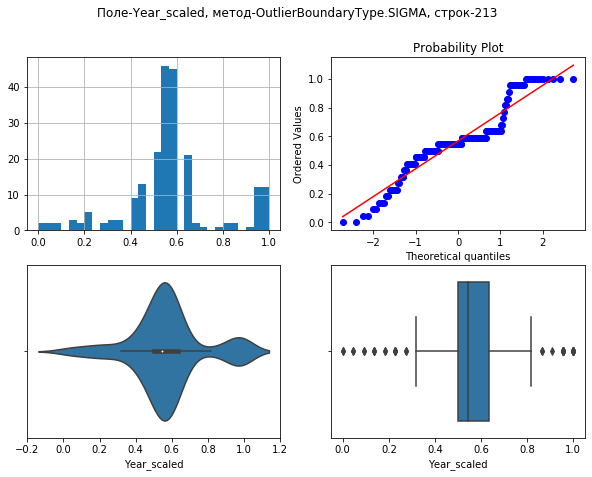

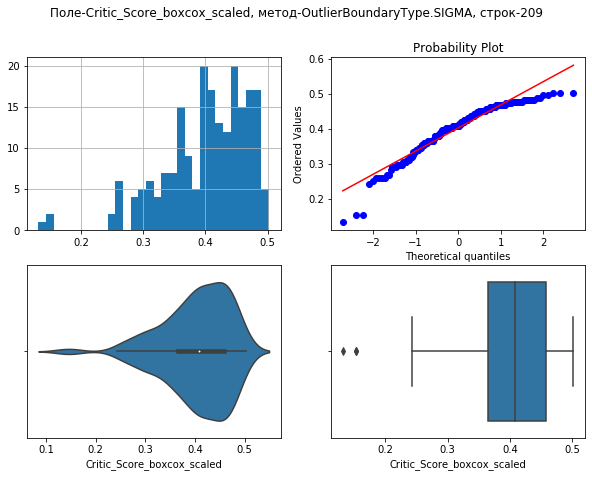

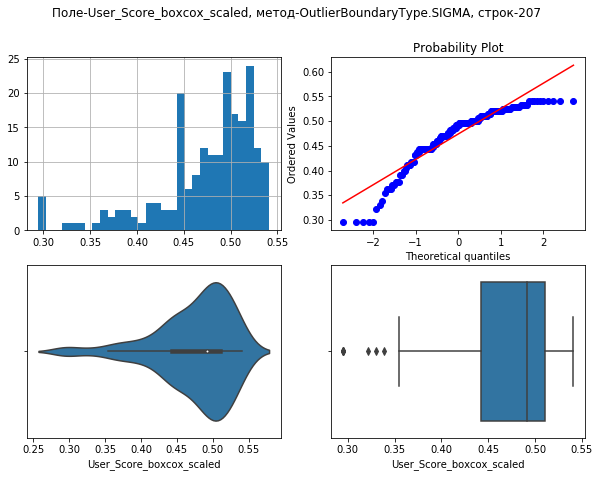

In [23]:
for col in scaled_columns:    
    obt = OutlierBoundaryType.SIGMA
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(df, col, obt)
    # Флаги для удаления выбросов
    outliers_temp = np.where(df[col] > upper_boundary, True, 
                             np.where(df[col] < lower_boundary, True, False))
    # Удаление данных на основе флага
    df_trimmed = df.loc[~(outliers_temp), ]
    title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, df_trimmed.shape[0])
    diagnostic_plots(df_trimmed, col, title)
    df = df_trimmed

In [24]:
df.tail(2)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,...,User_Score_boxcox,Sales_scaled,ESRB_Rating_scaled,Genre_scaled,Platform_scaled,Publisher_scaled,Developer_scaled,Year_scaled,Critic_Score_boxcox_scaled,User_Score_boxcox_scaled
216,54538,Perception,2,3,4,13,122,6.0,7.9,2017.0,...,1.179739,0.0,0.000000,0.142857,0.222222,0.302326,0.853147,0.954545,0.259299,0.436830
217,55424,Thumper,6,4,4,9,32,9.0,9.3,2017.0,...,1.224249,0.0,0.333333,0.428571,0.222222,0.209302,0.223776,0.954545,0.452359,0.510547


## Отбор признаков

### Методы фильтрации (filter methods)

На основе оценки корреляции

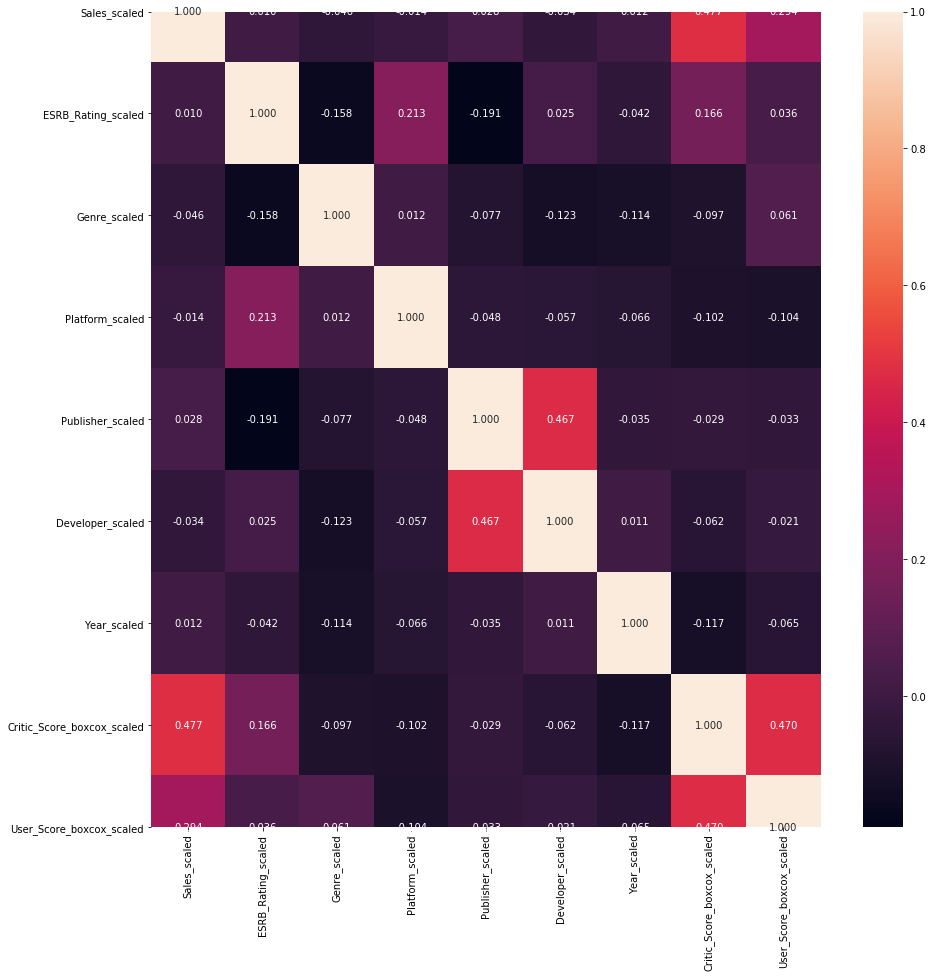

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df[scaled_columns].corr(), annot=True, fmt='.3f')
plt.show()

In [26]:
def make_corr_df(df, tr=0.6):
    cr = df.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= tr]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [27]:
make_corr_df(df)

,f1,f2,corr
0,Genre_scaled,Genre,1.000000
1,Genre,Genre_scaled,1.000000
2,ESRB_Rating_scaled,ESRB_Rating,1.000000
3,ESRB_Rating,ESRB_Rating_scaled,1.000000
4,Critic_Score,Critic_Score_boxcox,0.995070
5,Critic_Score_boxcox,Critic_Score,0.995070
6,Critic_Score_boxcox_scaled,Critic_Score,0.995070
7,Critic_Score,Critic_Score_boxcox_scaled,0.995070
8,User_Score,User_Score_boxcox_scaled,0.992664
9,User_Score_boxcox_scaled,User_Score,0.992664


In [28]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [29]:
# Группы коррелирующих признаков
drop_cols = []
for g in corr_groups(make_corr_df(df)):
    for f in g:
        if '_scaled' not in f:
            drop_cols.append(f)
            
print(drop_cols)

['Genre', 'ESRB_Rating', 'Critic_Score_boxcox', 'Critic_Score', 'User_Score_boxcox', 'User_Score']


### Методы обертывания (wrapper methods)

На основе алгоритма полного перебора

In [30]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [31]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LinearRegression()

In [32]:
y_column = 'Sales'

trash_cols = {y_column, 'Sales_scaled', 'Developer', 'Name', 'Platform', 'Rank', 'Year', 'Publisher'}
x_columns = set(df.columns) - trash_cols

print(y_column, x_columns)

Sales {'Critic_Score_boxcox_scaled', 'Publisher_scaled', 'Platform_scaled', 'ESRB_Rating', 'Critic_Score', 'Genre_scaled', 'Year_scaled', 'Critic_Score_boxcox', 'Genre', 'ESRB_Rating_scaled', 'User_Score_boxcox', 'Developer_scaled', 'User_Score', 'User_Score_boxcox_scaled'}


In [35]:
def train_efs(df, x_cols, y_col, min_f=2, max_f=4, cv=5, model=None, scoring='neg_mean_squared_error'):
    if model is None:
        model = LinearRegression()
    
    efs = EFS(model, 
               min_features=min_f,
               max_features=max_f,
               scoring=scoring,
               print_progress=True,
               cv=cv)
    efs = efs.fit(df[x_cols], pd.DataFrame(df[y_col]))

    print('Best accuracy score: %.2f' % efs.best_score_)
    print('Best subset (indices):', efs.best_idx_)
    print('Best subset (corresponding names):', efs.best_feature_names_)
    return efs

In [ ]:
efs1 = train_efs(df, x_columns, y_column, 4, 8, 5, lr)

In [ ]:
efs2 = train_efs(df, x_columns, y_column, 2, 8, 5, lr)

### Методы вложений (embedded methods)

На основе линейной регрессии

In [ ]:
e_ls1 = LinearRegression()
e_ls1.fit(df[x_columns], df[y_column])
# Коэффициенты регрессии
list(zip(x_columns, e_ls1.coef_))

In [ ]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(df[x_columns], df[y_column])
list(zip(x_columns, sel_e_ls1.get_support()))

### Очистка фич

In [ ]:
df = df.drop(columns=drop_cols)
df.head()

In [ ]:
# df.drop(columns=['Platform', 'Publisher', 'Developer', 'Year', 'Sales_scaled'])

## Сохраняем

In [ ]:
save_path = '../videogames/video_games_s3.csv'
df.to_csv(save_path, index=False)

In [ ]:
check_df = pd.read_csv(save_path)
check_df.head()